In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)

lng_range = (-180, 180)

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['tuatapere',
 'hermanus',
 'sangin',
 'rikitea',
 'balkanabat',
 'erzin',
 'puerto ayora',
 'norman wells',
 'anaconda',
 'marsa matruh',
 'luganville',
 'dikson',
 'isernia',
 'chokurdakh',
 'kuminskiy',
 'monrovia',
 'meulaboh',
 'nome',
 'kaeo',
 'kruisfontein',
 'port lincoln',
 'lebu',
 'yellowknife',
 'leningradskiy',
 'kapaa',
 'bengkulu',
 'punta arenas',
 'luderitz',
 'severo-yeniseyskiy',
 'kuva',
 'umm lajj',
 'yakeshi',
 'upernavik',
 'belushya guba',
 'severo-kurilsk',
 'esperance',
 'jamestown',
 'okakarara',
 'hamilton',
 'ouango',
 'quimper',
 'illoqqortoormiut',
 'butaritari',
 'onguday',
 'san quintin',
 'constitucion',
 'mys shmidta',
 'san patricio',
 'krasnovishersk',
 'ushuaia',
 'varhaug',
 'lucapa',
 'athabasca',
 'bubaque',
 'mataura',
 'yamaranguila',
 'mpigi',
 'hithadhoo',
 'tomigusuku',
 'nishihara',
 'safaga',
 'corinto',
 'kamenskoye',
 'khatanga',
 'chaa-khol',
 'salinopolis',
 'salta',
 'kimbe',
 'barrow',
 'te anau',
 'jega',
 'ambilobe',
 'eirunepe',

In [26]:
 # create a data frame from cities
weather_dict = {
    "city": cities
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city
0,tuatapere
1,hermanus
2,sangin
3,rikitea
4,balkanabat


In [27]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for index, row in weather_data.iterrows():

    # get restaurant type from df
    restr_type = row['city']

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {restr_type}.")
    response = requests.get(query_url + restr_type).json()
    
    # extract results
    #results = response['results']
    
    try:
        print(f"Closest {restr_type} restaurant is")
        
        weather_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_data.loc[index, 'Country'] = response['sys']['country']
        weather_data.loc[index, 'Date'] = response['dt']
        weather_data.loc[index, 'Humidity'] = response['main']['humidity']
        weather_data.loc[index, 'Lat'] = response['coord']['lat']
        weather_data.loc[index, 'Lng'] = response['coord']['lon']
        weather_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_data.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results for Index 0: tuatapere.
Closest tuatapere restaurant is
------------
Retrieving Results for Index 1: hermanus.
Closest hermanus restaurant is
------------
Retrieving Results for Index 2: sangin.
Closest sangin restaurant is
------------
Retrieving Results for Index 3: rikitea.
Closest rikitea restaurant is
------------
Retrieving Results for Index 4: balkanabat.
Closest balkanabat restaurant is
------------
Retrieving Results for Index 5: erzin.
Closest erzin restaurant is
------------
Retrieving Results for Index 6: puerto ayora.
Closest puerto ayora restaurant is
------------
Retrieving Results for Index 7: norman wells.
Closest norman wells restaurant is
------------
Retrieving Results for Index 8: anaconda.
Closest anaconda restaurant is
------------
Retrieving Results for Index 9: marsa matruh.
Closest marsa matruh restaurant is
------------
Retrieving Results for Index 10: luganville.
Closest luganville restaurant is
------------
Retrieving Results for Index 11

Closest petropavlovsk-kamchatskiy restaurant is
------------
Retrieving Results for Index 90: gornopravdinsk.
Closest gornopravdinsk restaurant is
------------
Retrieving Results for Index 91: festus.
Closest festus restaurant is
------------
Retrieving Results for Index 92: fasa.
Closest fasa restaurant is
------------
Retrieving Results for Index 93: sekudai.
Closest sekudai restaurant is
------------
Retrieving Results for Index 94: busselton.
Closest busselton restaurant is
------------
Retrieving Results for Index 95: svetlogorsk.
Closest svetlogorsk restaurant is
------------
Retrieving Results for Index 96: vaini.
Closest vaini restaurant is
------------
Retrieving Results for Index 97: atuona.
Closest atuona restaurant is
------------
Retrieving Results for Index 98: airai.
Closest airai restaurant is
------------
Retrieving Results for Index 99: provideniya.
Closest provideniya restaurant is
------------
Retrieving Results for Index 100: amapa.
Closest amapa restaurant is
----

Closest bethel restaurant is
------------
Retrieving Results for Index 180: nurota.
Closest nurota restaurant is
------------
Retrieving Results for Index 181: cidreira.
Closest cidreira restaurant is
------------
Retrieving Results for Index 182: novyy urgal.
Closest novyy urgal restaurant is
------------
Retrieving Results for Index 183: taicheng.
Closest taicheng restaurant is
------------
Retrieving Results for Index 184: roald.
Closest roald restaurant is
------------
Retrieving Results for Index 185: tawkar.
Closest tawkar restaurant is
Missing field/result... skipping.
------------
Retrieving Results for Index 186: baykit.
Closest baykit restaurant is
------------
Retrieving Results for Index 187: new norfolk.
Closest new norfolk restaurant is
------------
Retrieving Results for Index 188: kidal.
Closest kidal restaurant is
------------
Retrieving Results for Index 189: dodge city.
Closest dodge city restaurant is
------------
Retrieving Results for Index 190: xiaoshan.
Closest 

Closest comodoro rivadavia restaurant is
------------
Retrieving Results for Index 271: arrecife.
Closest arrecife restaurant is
------------
Retrieving Results for Index 272: phon.
Closest phon restaurant is
------------
Retrieving Results for Index 273: svetlyy.
Closest svetlyy restaurant is
------------
Retrieving Results for Index 274: varna.
Closest varna restaurant is
------------
Retrieving Results for Index 275: toro.
Closest toro restaurant is
------------
Retrieving Results for Index 276: kenai.
Closest kenai restaurant is
------------
Retrieving Results for Index 277: quatre cocos.
Closest quatre cocos restaurant is
------------
Retrieving Results for Index 278: taldan.
Closest taldan restaurant is
------------
Retrieving Results for Index 279: nuuk.
Closest nuuk restaurant is
------------
Retrieving Results for Index 280: walvis bay.
Closest walvis bay restaurant is
------------
Retrieving Results for Index 281: stokmarknes.
Closest stokmarknes restaurant is
------------
Re

Closest ebeltoft restaurant is
------------
Retrieving Results for Index 362: santa rosalia.
Closest santa rosalia restaurant is
------------
Retrieving Results for Index 363: viligili.
Closest viligili restaurant is
Missing field/result... skipping.
------------
Retrieving Results for Index 364: bambanglipuro.
Closest bambanglipuro restaurant is
------------
Retrieving Results for Index 365: birjand.
Closest birjand restaurant is
------------
Retrieving Results for Index 366: cazaje.
Closest cazaje restaurant is
Missing field/result... skipping.
------------
Retrieving Results for Index 367: carnduff.
Closest carnduff restaurant is
------------
Retrieving Results for Index 368: do gonbadan.
Closest do gonbadan restaurant is
------------
Retrieving Results for Index 369: mar del plata.
Closest mar del plata restaurant is
------------
Retrieving Results for Index 370: tornio.
Closest tornio restaurant is
------------
Retrieving Results for Index 371: russell.
Closest russell restaurant 

Closest severodvinsk restaurant is
------------
Retrieving Results for Index 454: touros.
Closest touros restaurant is
------------
Retrieving Results for Index 455: rocha.
Closest rocha restaurant is
------------
Retrieving Results for Index 456: sambava.
Closest sambava restaurant is
------------
Retrieving Results for Index 457: lorengau.
Closest lorengau restaurant is
------------
Retrieving Results for Index 458: berbera.
Closest berbera restaurant is
------------
Retrieving Results for Index 459: cotonou.
Closest cotonou restaurant is
------------
Retrieving Results for Index 460: ketchikan.
Closest ketchikan restaurant is
------------
Retrieving Results for Index 461: phonhong.
Closest phonhong restaurant is
------------
Retrieving Results for Index 462: speedway.
Closest speedway restaurant is
------------
Retrieving Results for Index 463: kodiak.
Closest kodiak restaurant is
------------
Retrieving Results for Index 464: samalaeulu.
Closest samalaeulu restaurant is
Missing fie

Closest cayenne restaurant is
------------
Retrieving Results for Index 543: aranos.
Closest aranos restaurant is
------------
Retrieving Results for Index 544: port augusta.
Closest port augusta restaurant is
------------
Retrieving Results for Index 545: fukue.
Closest fukue restaurant is
------------
Retrieving Results for Index 546: samusu.
Closest samusu restaurant is
Missing field/result... skipping.
------------
Retrieving Results for Index 547: benidorm.
Closest benidorm restaurant is
------------
Retrieving Results for Index 548: sidi ali.
Closest sidi ali restaurant is
------------
Retrieving Results for Index 549: minsk mazowiecki.
Closest minsk mazowiecki restaurant is
------------
Retrieving Results for Index 550: prince rupert.
Closest prince rupert restaurant is
------------
Retrieving Results for Index 551: ossora.
Closest ossora restaurant is
------------
Retrieving Results for Index 552: taltal.
Closest taltal restaurant is
------------
Retrieving Results for Index 55

In [28]:
weather_data.head()
weather_data.to_csv('temp_data.csv')

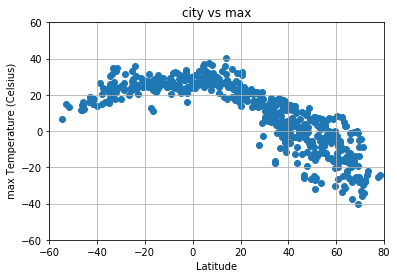

In [29]:
# Build a scatter plot for each data type
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.xlim(-60,80)
plt.ylim(-60,60)
plt.title("city vs max")
plt.ylabel(" max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.scatter(x_values,y_values)
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevsMaxTemp.png")

# Show plot
plt.show()

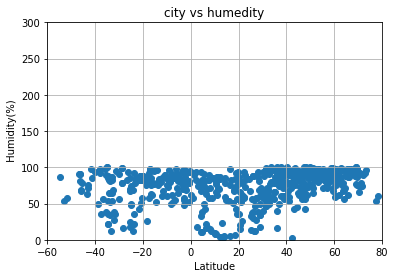

In [30]:
# Build a scatter plot for each data type
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.xlim(-60,80)
plt.ylim(0,300)
plt.title("city vs humedity")
plt.ylabel(" Humidity(%)")
plt.xlabel("Latitude")
plt.scatter(x_values,y_values)
plt.grid(True)

# Save the figure
plt.savefig("latitudevshumedity.png")

# Show plot
plt.show()

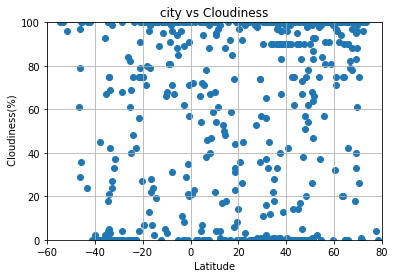

In [31]:
# Build a scatter plot for each data type
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.xlim(-60,80)
plt.ylim(0,100)
plt.title("city vs Cloudiness")
plt.ylabel(" Cloudiness(%)")
plt.xlabel("Latitude")
plt.scatter(x_values,y_values)
plt.grid(True)

# Save the figure
plt.savefig("latitudevsCloudiness.png")

# Show plot
plt.show()

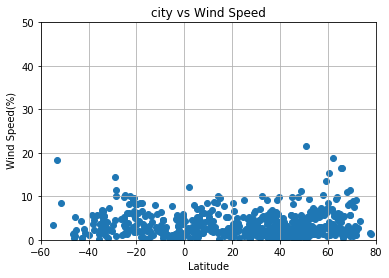

In [32]:
# Build a scatter plot for each data type
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.xlim(-60,80)
plt.ylim(0,50)
plt.title("city vs Wind Speed")
plt.ylabel(" Wind Speed(%)")
plt.xlabel("Latitude")
plt.scatter(x_values,y_values)
plt.grid(True)

# Save the figure
plt.savefig("latitudevsWind Speed.png")

# Show plot
plt.show()

In [33]:
#hemisferio norte
good_movies = weather_data.loc[weather_data["Lat"] > 0, [
    "city", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
good_movies.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,sangin,0.0,AF,1.579970e+09,66.0,32.07,64.84,8.55,1.67
4,balkanabat,0.0,TM,1.579970e+09,61.0,39.51,54.37,0.24,1.54
5,erzin,0.0,TR,1.579970e+09,49.0,36.96,36.20,11.11,0.89
7,norman wells,100.0,CA,1.579970e+09,97.0,65.28,-126.83,-25.73,5.90
8,anaconda,83.0,US,1.579970e+09,85.0,46.13,-112.94,-2.78,3.75


In [34]:
#hemisferio sur
good_movies2 = weather_data.loc[weather_data["Lat"] < 0, [
    "city", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
good_movies2.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuatapere,29.0,NZ,1.579969e+09,91.0,-46.13,167.68,11.67,1.27
1,hermanus,18.0,ZA,1.579970e+09,85.0,-34.42,19.23,20.56,5.36
3,rikitea,0.0,PF,1.579969e+09,79.0,-23.12,-134.97,25.62,6.06
6,puerto ayora,57.0,EC,1.579970e+09,52.0,-0.74,-90.35,25.00,3.58
10,luganville,24.0,VU,1.579970e+09,95.0,-15.53,167.17,21.42,0.24


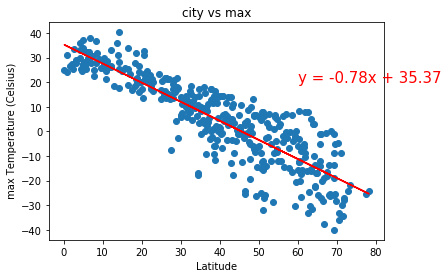

The r-squared is: -0.8687148140371823


In [35]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot
x_values = good_movies['Lat']
y_values = good_movies['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.title("city vs max")
plt.ylabel(" max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.savefig("nortelatitudevstempLR.png")
plt.show()
print(f"The r-squared is: {rvalue}")

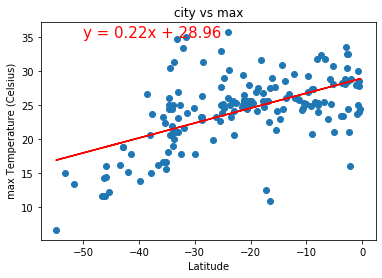

The r-squared is: 0.5641129235984418


In [36]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot
x_values = good_movies2['Lat']
y_values = good_movies2['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.title("city vs max")
plt.ylabel(" max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.savefig("surlatitudevstempLR.png")
plt.show()
print(f"The r-squared is: {rvalue}")

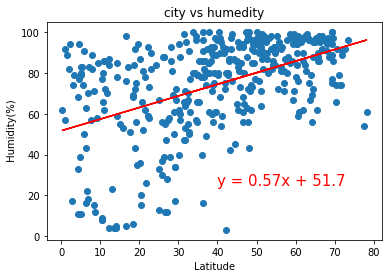

The r-squared is: 0.4761979063839401


In [37]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot

x_values = good_movies['Lat']
y_values = good_movies['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("city vs humedity")
plt.ylabel(" Humidity(%)")
plt.xlabel("Latitude")
plt.savefig("nortelatitudevshumLR.png")
plt.show()
print(f"The r-squared is: {rvalue}")

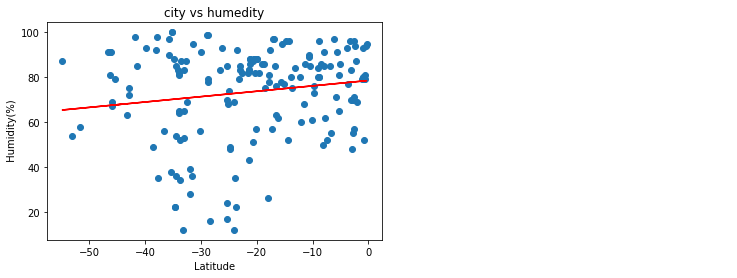

The r-squared is: 0.15525028860583687


In [38]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot

x_values = good_movies2['Lat']
y_values = good_movies2['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("city vs humedity")
plt.ylabel(" Humidity(%)")
plt.xlabel("Latitude")
plt.savefig("surlatitudevshumLR.png")
plt.show()
print(f"The r-squared is: {rvalue}")

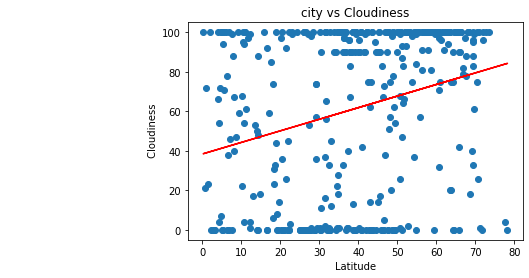

The r-squared is: 0.2752818033477961


In [39]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot
x_values = good_movies['Lat']
y_values = good_movies['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.title("city vs Cloudiness")
plt.ylabel(" Cloudiness")
plt.xlabel("Latitude")
plt.savefig("nortelatitudevsCloudiness.png")
plt.show()
print(f"The r-squared is: {rvalue}")

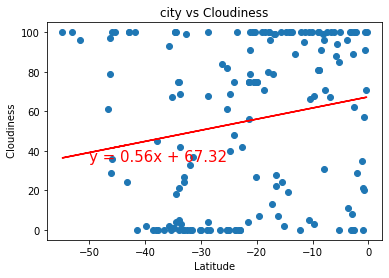

The r-squared is: 0.1851577701201668


In [40]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot
x_values = good_movies2['Lat']
y_values = good_movies2['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.title("city vs Cloudiness")
plt.ylabel(" Cloudiness")
plt.xlabel("Latitude")
plt.savefig("SUrlatitudevsCloudiness.png")
plt.show()
print(f"The r-squared is: {rvalue}")

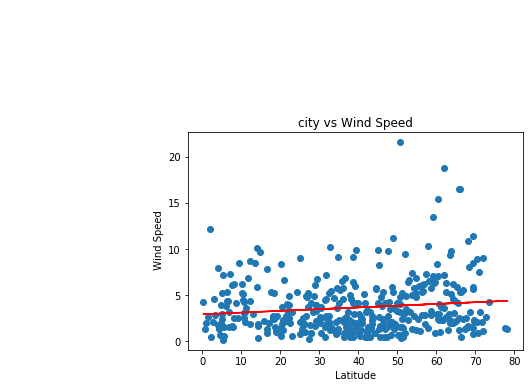

The r-squared is: 0.12292828185029915


In [41]:
 #Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
    #Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot
x_values = good_movies['Lat']
y_values = good_movies['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.title("city vs Wind Speed")
plt.ylabel(" Wind Speed")
plt.xlabel("Latitude")
plt.savefig("nortelatitudevsWind Speed.png")
plt.show()
print(f"The r-squared is: {rvalue}")

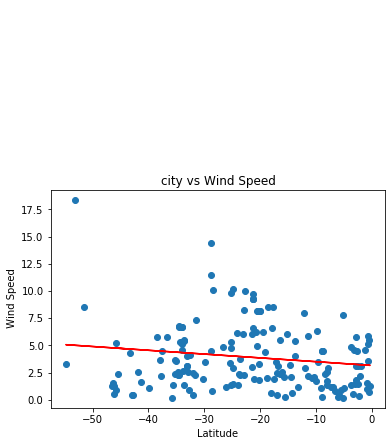

The r-squared is: -0.15646806477970246


In [42]:
 #Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
    #Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Perform a linear regression on violent crime rate versus year
# Add the linear regression equation and line to plot
x_values = good_movies2['Lat']
y_values = good_movies2['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.title("city vs Wind Speed")
plt.ylabel(" Wind Speed")
plt.xlabel("Latitude")
plt.savefig("SURlatitudevsWind Speed.png")
plt.show()
print(f"The r-squared is: {rvalue}")